<a href="https://colab.research.google.com/github/ishitabhatt2001/CNN-weapon-classification/blob/main/CNN_Weapon_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#importing libraries
import pandas as pd


In [10]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import numpy as np
from numpy import asarray
import glob
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import utils


In [11]:
!#importing in image feom path
img = cv2.imread("/content/drive/MyDrive/cnn data/weapon_detection/train/images/Automatic Rifle_10.jpeg")
#image dimensions
print(img)


[[[ 99 137 167]
  [ 99 137 167]
  [100 138 168]
  ...
  [ 96 130 159]
  [ 96 130 159]
  [ 96 130 159]]

 [[100 138 168]
  [100 138 168]
  [100 138 168]
  ...
  [ 96 130 159]
  [ 96 130 159]
  [ 96 130 159]]

 [[102 140 170]
  [102 140 170]
  [102 140 170]
  ...
  [ 96 130 159]
  [ 96 130 159]
  [ 96 130 159]]

 ...

 [[122 162 187]
  [122 162 187]
  [122 162 187]
  ...
  [128 160 183]
  [127 159 182]
  [127 159 182]]

 [[122 162 187]
  [122 162 187]
  [122 162 187]
  ...
  [127 159 182]
  [126 158 181]
  [126 158 181]]

 [[122 162 187]
  [122 162 187]
  [122 162 187]
  ...
  [126 158 181]
  [125 157 180]
  [125 157 180]]]


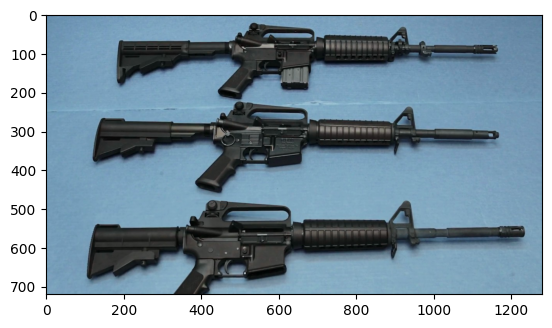

In [12]:
#plotting the image
plt.imshow(img)

In [13]:
#creating 2 arrays for images and labels
images = []
label =[]

#using glob , getting all image files with respect to the labels

for file in glob.glob("/content/drive/MyDrive/cnn data/weapon_detection/train/images/*"):
    temp = np.asarray(Image.open(file).resize((400,400), Image.ANTIALIAS))
    if (len(temp.shape)==3 and temp.shape[2]==3):

      if('Automatic Rifle' in file):
        images.append(temp)
        label.append(0)
      elif('Bazooka' in file):
        images.append(temp)
        label.append(1)
      elif("Grenade" in file):
        images.append(temp)
        label.append(2)
      elif('Handgun' in file):
        images.append(temp)
        label.append(3)

      elif('Knife' in file):
        images.append(temp)
        label.append(4)

      elif('Shotgun' in file):
        images.append(temp)
        label.append(5)

      elif( 'SMG' in file):
        images.append(temp)
        label.append(6)

      elif('Sniper' in file):
        images.append(temp)
        label.append(7)

      elif('Sword' in file):
        images.append(temp)
        label.append(8)



<ipython-input-13-1e8f77364817>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  temp = np.asarray(Image.open(file).resize((400,400), Image.ANTIALIAS))


In [14]:
#number of images and label
print(len(images))
print(len(label))

523
523


In [15]:
#getting images and labels in an array
train_images = np.array(images)

print(type(train_images))
print(train_images.shape)
print(len(label))

train_labels = np.array(label)

print(type(train_labels))
print(train_labels.shape)

#defining rows,cols and dims
nRows, nCols, nDims = train_images.shape[1:]

print(nRows, nCols, nDims)


<class 'numpy.ndarray'>
(523, 400, 400, 3)
523
<class 'numpy.ndarray'>
(523,)
400 400 3


In [16]:

## For Validation Purpose

#200*200--> 400*400

#creting test images and labels array
test_images = []

test_label= []

#getting images for validation
for file in glob.glob("/content/drive/MyDrive/cnn data/weapon_detection/val/images/*"):

  temp = np.asarray(Image.open(file).resize((400,400), Image.ANTIALIAS))
  if(len(temp.shape)==3 and temp.shape[2]==3):

    if('Automatic Rifle' in file):
       test_images.append(temp)
       test_label.append(0)
    elif('Bazooka' in file):
      test_images.append(temp)
      test_label.append(1)
    elif('Grenade' in file):
      test_images.append(temp)
      test_label.append(2)
    elif('Handgun' in file):
         test_images.append(temp)
         test_label.append(3)
    elif('Knife' in file):
      test_images.append(temp)
      test_label.append(4)
    elif('Shotgun' in file):
      test_images.append(temp)
      test_label.append(5)
    elif('SMG 'in file):
      test_images.append(temp)
      test_label.append(6)

    elif('Sniper' in file):
      test_images.append(temp)
      test_label.append(7)

    elif('Sword' in file):
      test_images.append(temp)
      test_label.append(8)




<ipython-input-16-1e85e1fefa83>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  temp = np.asarray(Image.open(file).resize((400,400), Image.ANTIALIAS))


In [17]:
#number of images and labels
#and shape
print(len(test_images))

test_images = np.array(test_images)

print(type(test_images))
print(test_images.shape)
print(len(test_label))

test_labels=np.array(test_label)

print(type(test_labels))
print(test_labels.shape)


119
<class 'numpy.ndarray'>
(119, 400, 400, 3)
119
<class 'numpy.ndarray'>
(119,)


In [18]:


nRows, nCols, nDims = train_images.shape[1:]
train_data=train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

#defining input shape

input_shape=(nRows, nCols, nDims)

#defining data type
train_data = train_data.astype('float32')

test_data = test_data.astype('float32')

train_data /= 255

test_data /= 255

#changing labels to hot encoding
from keras.utils import to_categorical
train_labels_one_hot =to_categorical(train_labels)
test_labels_one_hot =to_categorical(test_labels)

print("Original label :", train_labels[1])
print("After conversion to categorical (one-hot ): ",train_labels_one_hot[1])

#number of classes
classes= np.unique(train_labels)

nclasses = len(classes)

#model creation
def createModel():
    model= Sequential()

    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))

    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout (0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add (Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout (0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout (0.25))

    model.add(Flatten())

    model.add(Dense (512, activation='relu'))

    model.add(Dropout (0.5))



    model.add(Dense (9, activation='softmax'))
    return model

Original label : 0
After conversion to categorical (one-hot ):  [1. 0. 0. 0. 0. 0. 0. 0. 0.]


# New section

In [ ]:
model1 = createModel()
#batch_size = 256
#epochs 20 batch_size 32

batch_size=32
epochs=22

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

print(model1.summary())

  # fit model

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size,
                     epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))

model1.evaluate(test_data, test_labels_one_hot)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 400, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 398, 398, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 199, 199, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 199, 199, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 197, 197, 64)      36928     
                                                        

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()